In [15]:
# Calcular la media
def EE_media(lista):
    if not lista:
        raise ValueError("La lista no puede estar vacía")
    return sum(lista) / len(lista)

# Calcular la mediana
def EE_mediana(lista):
    if not lista:
        raise ValueError("La lista no puede estar vacía")
    lista_ordenada = sorted(lista)
    n = len(lista_ordenada)
    mitad = n // 2
    if n % 2 == 0:  # Si el número de elementos es par
        return (lista_ordenada[mitad - 1] + lista_ordenada[mitad]) / 2
    else:  # Si el número de elementos es impar
        return lista_ordenada[mitad]

# Calcular la moda
def EE_moda(lista):
    if not lista:
        raise ValueError("La lista no puede estar vacía")
    conteo = {}
    for elemento in lista:
        conteo[elemento] = conteo.get(elemento, 0) + 1
    max_frecuencia = max(conteo.values())
    modas = [k for k, v in conteo.items() if v == max_frecuencia]
    return modas if len(modas) > 1 else modas[0]

# Calcular la desviación estándar
def EE_desviacion_estandar(lista):
    if len(lista) < 2:
        raise ValueError("La lista debe contener al menos dos elementos")
    media = EE_media(lista)
    varianza = sum((x - media) ** 2 for x in lista) / len(lista)
    return varianza ** 0.5

# Calcular los cuartiles
def EE_cuartiles(lista):
    if not lista:
        raise ValueError("La lista no puede estar vacía")
    lista_ordenada = sorted(lista)
    n = len(lista_ordenada)
    q1 = EE_mediana(lista_ordenada[:n // 2])
    q3 = EE_mediana(lista_ordenada[(n + 1) // 2:])  # Considerar la segunda mitad
    return q1, q3

# Calcular el rango intercuartílico (IQR)
def EE_iqr(lista):
    q1, q3 = EE_cuartiles(lista)
    return q3 - q1

# Calcular la amplitud de la muestra
def EE_amplitud(lista):
    if not lista:
        raise ValueError("La lista no puede estar vacía")
    return max(lista) - min(lista)

# Calcular el coeficiente de correlación de Pearson
def EE_correlacion_pearson(lista_x, lista_y):
    if len(lista_x) != len(lista_y) or len(lista_x) < 2:
        raise ValueError("Las listas deben tener el mismo tamaño y contener al menos dos elementos")
    media_x = EE_media(lista_x)
    media_y = EE_media(lista_y)
    covarianza = sum((x - media_x) * (y - media_y) for x, y in zip(lista_x, lista_y))
    desviacion_x = EE_desviacion_estandar(lista_x)
    desviacion_y = EE_desviacion_estandar(lista_y)
    return covarianza / (len(lista_x) * desviacion_x * desviacion_y)

# Calcular la desviación absoluta mediana (MAD)
def EE_mad(lista):
    if not lista:
        raise ValueError("La lista no puede estar vacía")
    mediana = EE_mediana(lista)
    desviaciones = [abs(x - mediana) for x in lista]
    return EE_mediana(desviaciones)



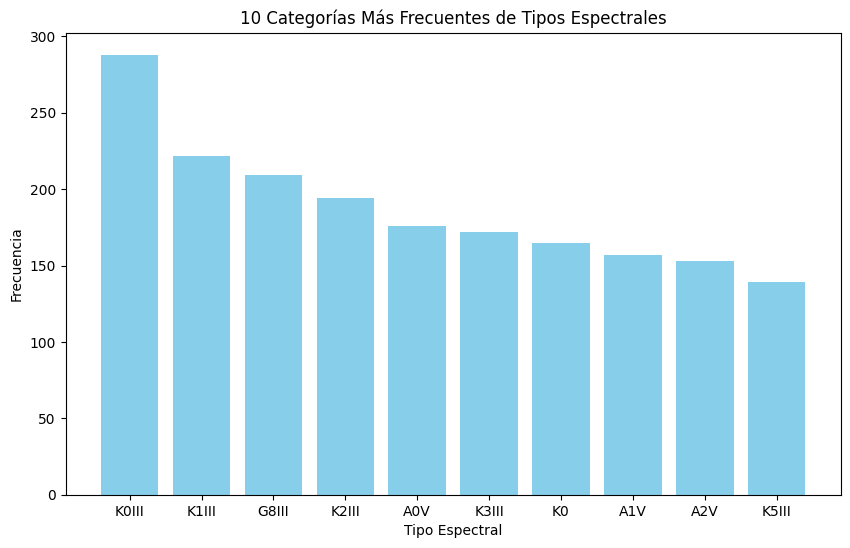

La moda de los tipos espectrales es: K0III
Los tres tipos espectrales más comunes son:
K0III: 288
K1III: 222
G8III: 209


In [17]:
# ------punto 1------
# Importar las librerías necesarias
import matplotlib.pyplot as plt

# Función para leer el archivo "bsc_sel.dat"
def leer_archivo_bsc(file_path):
    with open(file_path, 'r') as file:
        data = file.readlines()
    columnas = ['HR', 'HD', 'Vmag', 'B-V', 'SpType']
    estrellas = []
    for linea in data:
        partes = linea.split()
        if len(partes) >= 5:  # Asegurarse de que la línea tiene las columnas necesarias
            estrellas.append({
                'HR': partes[0],
                'HD': partes[1],
                'Vmag': partes[2],
                'B-V': partes[3],
                'SpType': partes[4]
            })
    return estrellas

# Leer los datos del archivo "bsc_sel.dat"
bsc_data = leer_archivo_bsc('/content/bsc_sel.dat')

# Extraer los tipos espectrales eliminando valores no válidos
tipos_espectrales = [estrella['SpType'] for estrella in bsc_data if estrella['SpType'] != '']

# Calcular las 10 categorías más frecuentes
def categorias_mas_frecuentes(lista, n=10):
    frecuencia = {}
    for item in lista:
        frecuencia[item] = frecuencia.get(item, 0) + 1
    return sorted(frecuencia.items(), key=lambda x: x[1], reverse=True)[:n]

categorias_frecuentes = categorias_mas_frecuentes(tipos_espectrales)

# Extraer las categorías y sus frecuencias para graficar
categorias = [categoria[0] for categoria in categorias_frecuentes]
frecuencias = [categoria[1] for categoria in categorias_frecuentes]

# Graficar las 10 categorías más frecuentes
plt.figure(figsize=(10, 6))
plt.bar(categorias, frecuencias, color='skyblue')
plt.xlabel('Tipo Espectral')
plt.ylabel('Frecuencia')
plt.title('10 Categorías Más Frecuentes de Tipos Espectrales')
plt.show()

# Calcular la moda usando la función EE_moda
moda = EE_moda(tipos_espectrales)
print(f"La moda de los tipos espectrales es: {moda}")

# Determinar los tres tipos espectrales más comunes
print("Los tres tipos espectrales más comunes son:")
for categoria, frecuencia in categorias_frecuentes[:3]:
    print(f"{categoria}: {frecuencia}")


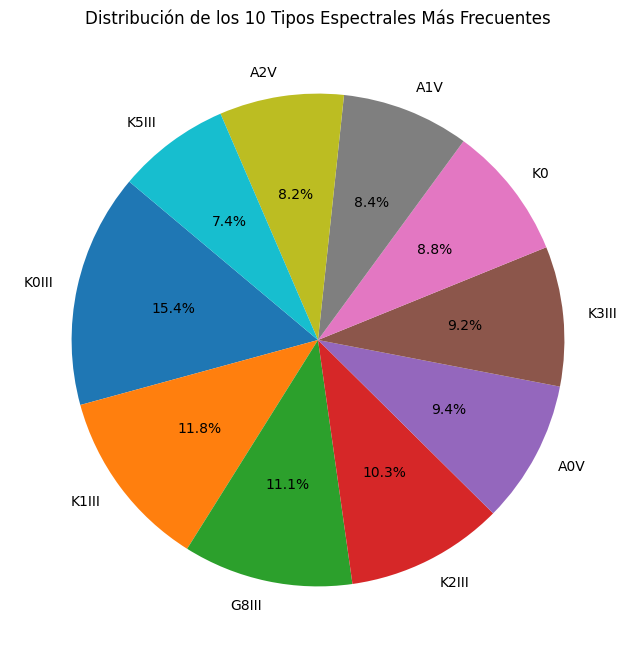

In [25]:


# ------punto 2------
# Graficar un gráfico de torta para los 10 tipos espectrales más frecuentes
plt.figure(figsize=(8, 8))
plt.pie(frecuencias, labels=categorias, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Distribución de los 10 Tipos Espectrales Más Frecuentes')
plt.show()


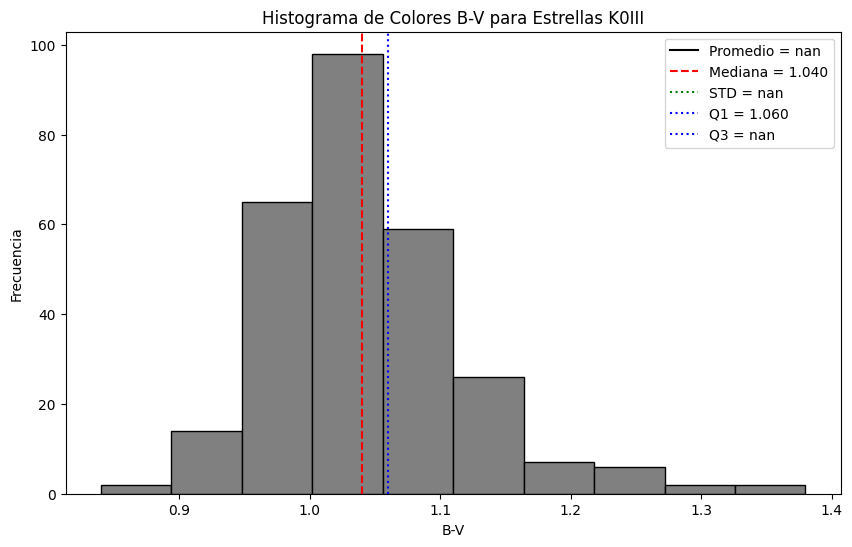

In [26]:
# ------punto 3------
# Seleccionar estrellas de tipo espectral K0III
estrellas_k0iii = [float(estrella['B-V']) for estrella in bsc_data if estrella['SpType'] == 'K0III' and estrella['B-V'] != '']

# Regla de Freeman & Diaconis para calcular el número de bines
def calcular_bines(datos):
    q1, q3 = EE_cuartiles(datos)
    iqr = q3 - q1
    bin_width = 2 * iqr / len(datos) ** (1 / 3)
    num_bins = int((max(datos) - min(datos)) / bin_width) if bin_width > 0 else 10
    return max(1, num_bins)

num_bines = calcular_bines(estrellas_k0iii)

# Graficar el histograma
plt.figure(figsize=(10, 6))
plt.hist(estrellas_k0iii, bins=num_bines, color='grey', edgecolor='black')
plt.xlabel('B-V')
plt.ylabel('Frecuencia')
plt.title('Histograma de Colores B-V para Estrellas K0III')

# Calcular y marcar el promedio
promedio = EE_media(estrellas_k0iii)
plt.axvline(promedio, color='black', linestyle='-', label=f'Promedio = {promedio:.3f}')

# Calcular y marcar la mediana
mediana = EE_mediana(estrellas_k0iii)
plt.axvline(mediana, color='red', linestyle='--', label=f'Mediana = {mediana:.3f}')

# Calcular y marcar la desviación estándar
std = EE_desviacion_estandar(estrellas_k0iii)
plt.axvline(promedio - std, color='green', linestyle=':', label=f'STD = {std:.3f}')
plt.axvline(promedio + std, color='green', linestyle=':')

# Calcular y marcar los cuartiles
q1, q3 = EE_cuartiles(estrellas_k0iii)
plt.axvline(q1, color='blue', linestyle=':', label=f'Q1 = {q1:.3f}')
plt.axvline(q3, color='blue', linestyle=':', label=f'Q3 = {q3:.3f}')

plt.legend()
plt.show()

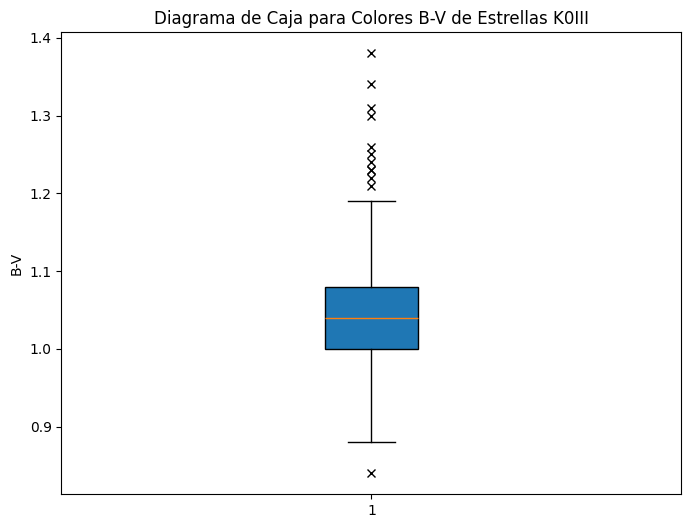

In [28]:
# ------punto 4------
# Filtrar valores válidos para B-V de estrellas K0III
estrellas_k0iii = [
    float(estrella['B-V'])
    for estrella in bsc_data
    if estrella['SpType'] == 'K0III' and estrella['B-V'].replace('.', '', 1).isdigit()
]

# Validar si la lista no está vacía
if estrellas_k0iii:
    # Crear un diagrama de caja para los colores B-V de las estrellas K0III
    plt.figure(figsize=(8, 6))
    boxplot = plt.boxplot(
        estrellas_k0iii,
        patch_artist=True,
        flierprops=dict(marker='x', color='green')
    )
    plt.title('Diagrama de Caja para Colores B-V de Estrellas K0III')
    plt.ylabel('B-V')
    plt.show()
else:
    print("No hay datos válidos para los colores B-V de las estrellas K0III.")


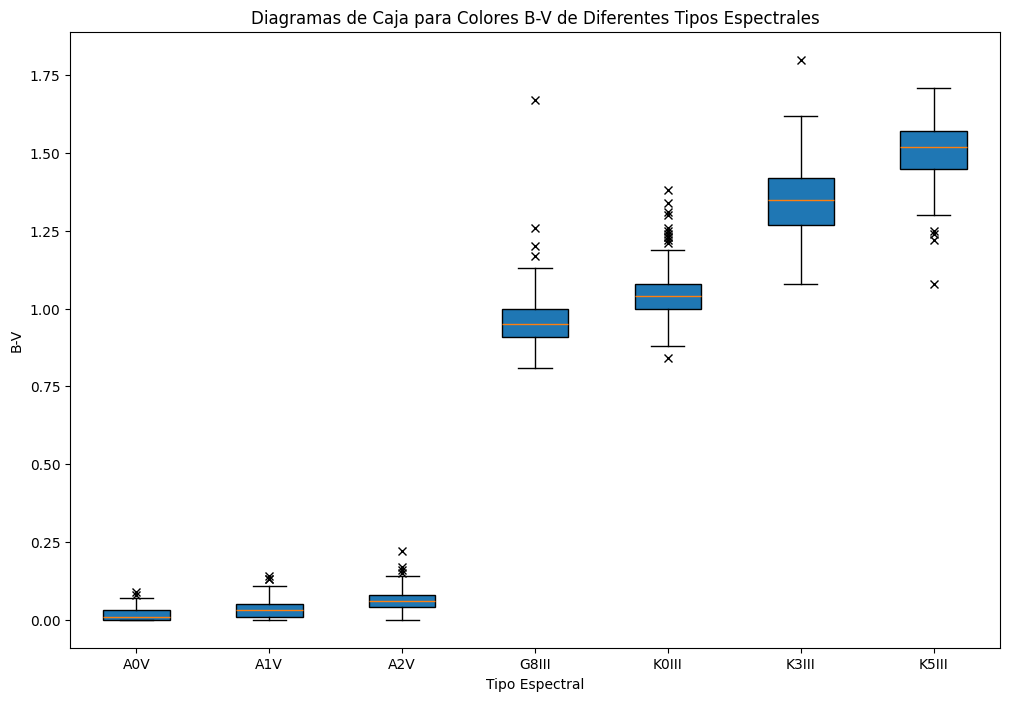

In [29]:
# ------punto 5------
# Crear diagramas de caja para diferentes tipos espectrales
seleccion_tipos = ['A0V', 'A1V', 'A2V', 'G8III', 'K0III', 'K3III', 'K5III']
colores_bv = {tipo: [float(estrella['B-V']) for estrella in bsc_data
                     if estrella['SpType'] == tipo and estrella['B-V'].replace('.', '', 1).isdigit()]
              for tipo in seleccion_tipos}

# Crear diagramas de caja
plt.figure(figsize=(12, 8))
plt.boxplot(colores_bv.values(), patch_artist=True, flierprops=dict(marker='x', color='green'))
plt.xticks(range(1, len(seleccion_tipos) + 1), seleccion_tipos)
plt.title('Diagramas de Caja para Colores B-V de Diferentes Tipos Espectrales')
plt.ylabel('B-V')
plt.xlabel('Tipo Espectral')
plt.show()


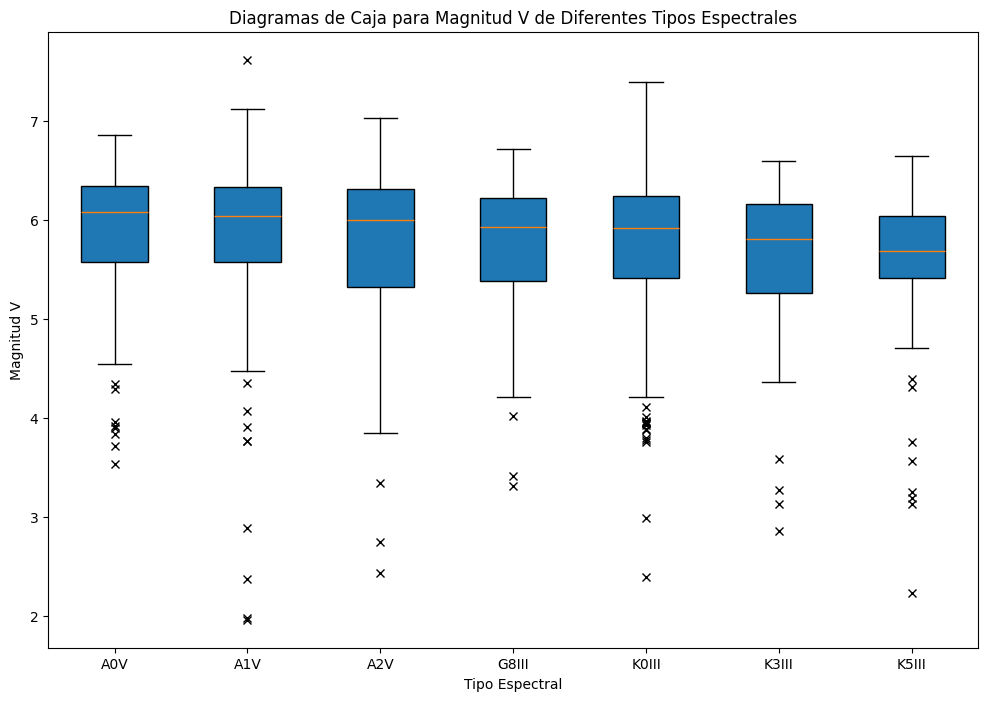

In [30]:
# ------punto 6------
# Crear diagramas de caja para la magnitud V de diferentes tipos espectrales
magnitudes_v = {tipo: [float(estrella['Vmag']) for estrella in bsc_data
                       if estrella['SpType'] == tipo and estrella['Vmag'].replace('.', '', 1).isdigit()]
                for tipo in seleccion_tipos}

# Crear diagramas de caja para Vmag
plt.figure(figsize=(12, 8))
plt.boxplot(magnitudes_v.values(), patch_artist=True, flierprops=dict(marker='x', color='green'))
plt.xticks(range(1, len(seleccion_tipos) + 1), seleccion_tipos)
plt.title('Diagramas de Caja para Magnitud V de Diferentes Tipos Espectrales')
plt.ylabel('Magnitud V')
plt.xlabel('Tipo Espectral')
plt.show()

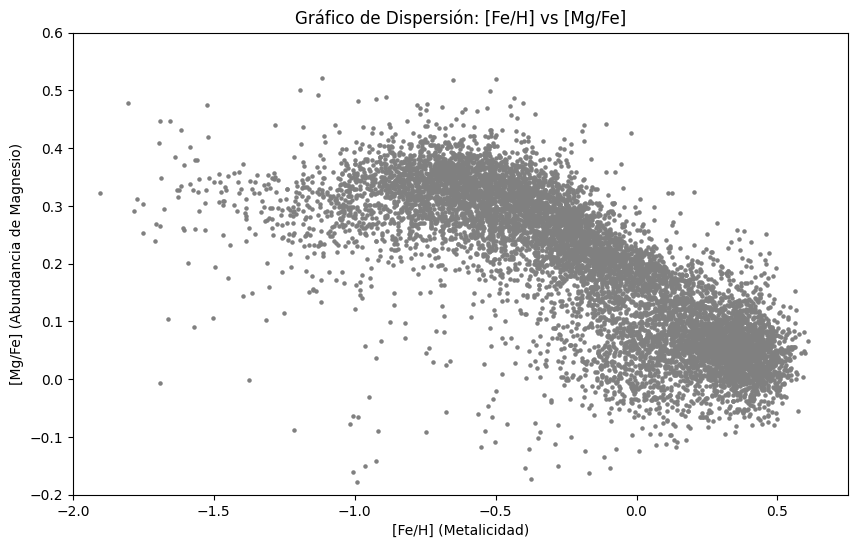

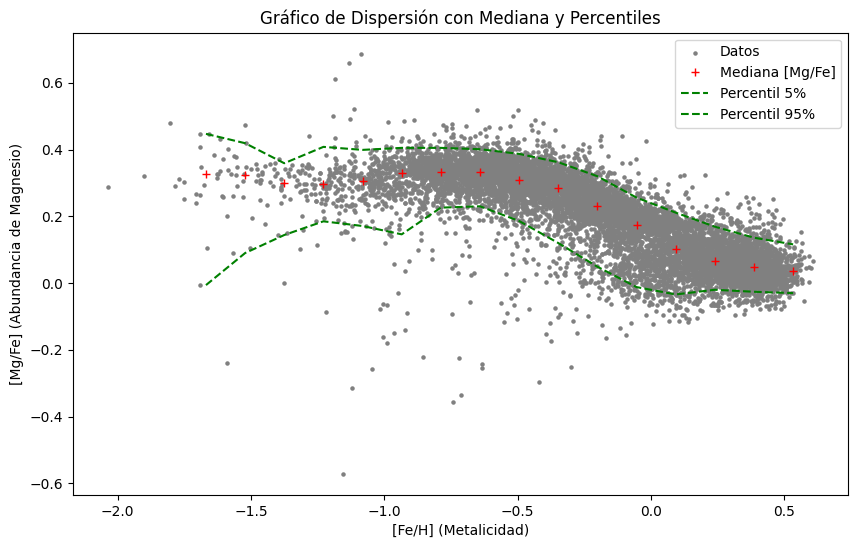

In [32]:
# ------punto 7------
# Leer el archivo "bulbo_galactico.dat" y extraer las columnas necesarias
def leer_archivo_bulbo(file_path):
    with open(file_path, 'r') as file:
        data = file.readlines()
    estrellas = []
    for linea in data[1:]:  # Saltar el encabezado
        partes = linea.split()
        if len(partes) >= 6:
            estrellas.append({
                'fe_h': float(partes[4]),  # Metalicidad [Fe/H]
                'mg_fe': float(partes[5])  # Abundancia de Mg/Fe
            })
    return estrellas

bulbo_data = leer_archivo_bulbo('/content/bulbo_galactico.dat')

# Extraer las columnas necesarias
fe_h = [estrella['fe_h'] for estrella in bulbo_data]
mg_fe = [estrella['mg_fe'] for estrella in bulbo_data]

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(fe_h, mg_fe, s=5, color='grey')
plt.xlabel('[Fe/H] (Metalicidad)')
plt.ylabel('[Mg/Fe] (Abundancia de Magnesio)')
plt.title('Gráfico de Dispersión: [Fe/H] vs [Mg/Fe]')
plt.xlim(-2.0, 0.75)
plt.ylim(-0.2, 0.6)
plt.show()

# Dividir el rango de [Fe/H] en 18 intervalos y calcular la mediana de [Mg/Fe]
def calcular_percentiles(datos_x, datos_y, bins=18):
    intervalo = (max(datos_x) - min(datos_x)) / bins
    puntos_x, medianas_y, p5_y, p95_y = [], [], [], []
    for i in range(bins):
        lim_inf = min(datos_x) + i * intervalo
        lim_sup = lim_inf + intervalo
        valores_y = [y for x, y in zip(datos_x, datos_y) if lim_inf <= x < lim_sup]
        if len(valores_y) > 5:  # Al menos 5 puntos
            puntos_x.append((lim_inf + lim_sup) / 2)
            medianas_y.append(EE_mediana(valores_y))
            p5_y.append(sorted(valores_y)[int(len(valores_y) * 0.05)])
            p95_y.append(sorted(valores_y)[int(len(valores_y) * 0.95)])
    return puntos_x, medianas_y, p5_y, p95_y

puntos_x, medianas_y, p5_y, p95_y = calcular_percentiles(fe_h, mg_fe)

# Graficar las curvas
plt.figure(figsize=(10, 6))
plt.scatter(fe_h, mg_fe, s=5, color='grey', label='Datos')
plt.plot(puntos_x, medianas_y, 'r+', label='Mediana [Mg/Fe]')
plt.plot(puntos_x, p5_y, 'g--', label='Percentil 5%')
plt.plot(puntos_x, p95_y, 'g--', label='Percentil 95%')
plt.xlabel('[Fe/H] (Metalicidad)')
plt.ylabel('[Mg/Fe] (Abundancia de Magnesio)')
plt.title('Gráfico de Dispersión con Mediana y Percentiles')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


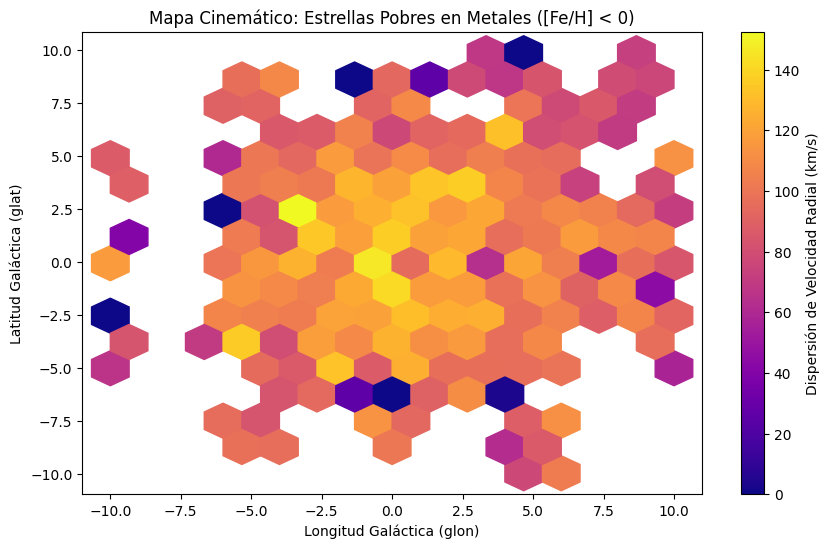

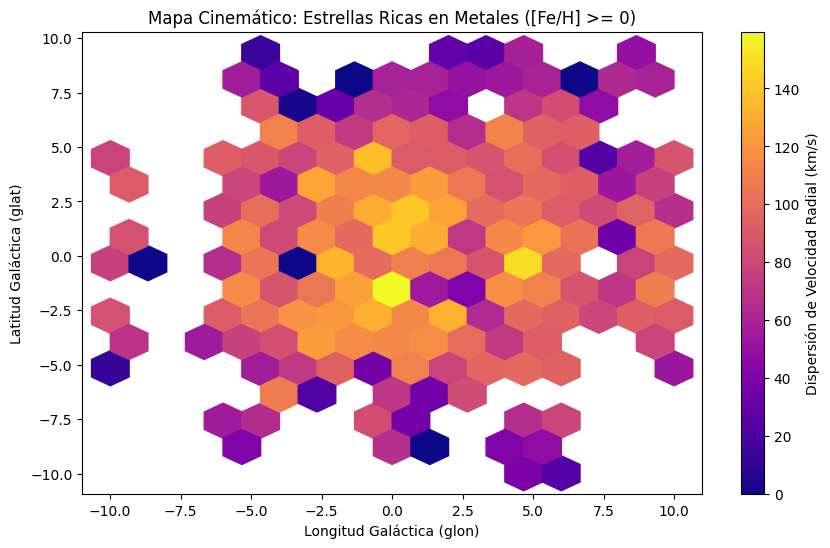

In [36]:
# ------punto 8------
import numpy as np

# Separar las estrellas en pobres y ricas en metales
fe_h_pobres = [estrella for estrella in bulbo_data if estrella['fe_h'] < 0]
fe_h_ricas = [estrella for estrella in bulbo_data if estrella['fe_h'] >= 0]

def mapa_cinematico(datos, titulo):
    glon = [estrella['glon'] for estrella in datos]
    glat = [estrella['glat'] for estrella in datos]
    vrad = [estrella['vrad'] for estrella in datos]

    # Crear mapa 2D con dispersión estándar de velocidad radial
    plt.figure(figsize=(10, 6))
    hb = plt.hexbin(glon, glat, C=vrad, gridsize=15, reduce_C_function=np.std, cmap='plasma')
    cb = plt.colorbar(hb, label='Dispersión de Velocidad Radial (km/s)')
    plt.xlabel('Longitud Galáctica (glon)')
    plt.ylabel('Latitud Galáctica (glat)')
    plt.title(titulo)
    plt.show()

# Crear mapas cinemáticos
mapa_cinematico(fe_h_pobres, 'Mapa Cinemático: Estrellas Pobres en Metales ([Fe/H] < 0)')
mapa_cinematico(fe_h_ricas, 'Mapa Cinemático: Estrellas Ricas en Metales ([Fe/H] >= 0)')

#

El coeficiente de correlación entre [Mg/Fe] y [O/Fe] es: 0.918


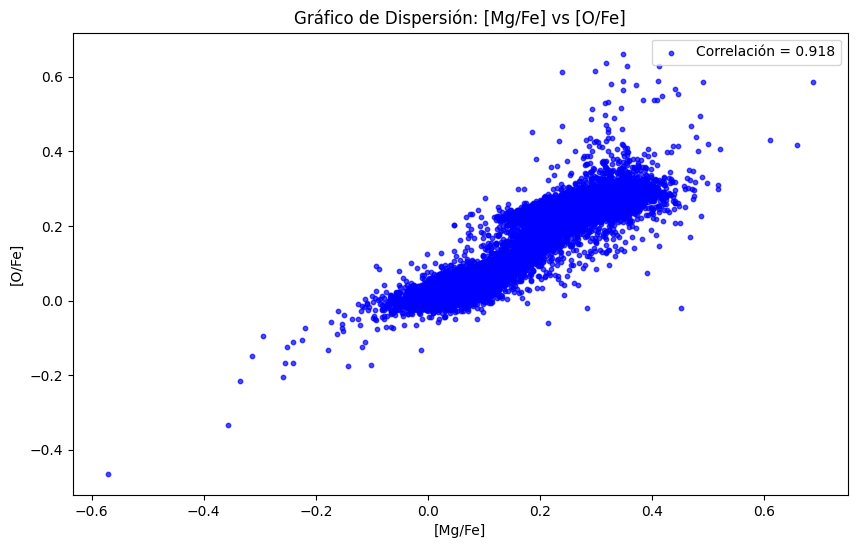

In [39]:
# ------punto 9------
# Calcular coeficiente de correlación entre [Mg/Fe] y [O/Fe]
def EE_correlacion(x, y):
    media_x = EE_media(x)
    media_y = EE_media(y)
    cov = sum((a - media_x) * (b - media_y) for a, b in zip(x, y))
    std_x = EE_desviacion_estandar(x)
    std_y = EE_desviacion_estandar(y)
    return cov / (len(x) * std_x * std_y)

# Extraer las columnas [Mg/Fe] y [O/Fe]
o_fe = [estrella['o_fe'] for estrella in bulbo_data]
mg_fe = [estrella['mg_fe'] for estrella in bulbo_data]

# Calcular el coeficiente de correlación
correlacion = EE_correlacion(mg_fe, o_fe)
print(f"El coeficiente de correlación entre [Mg/Fe] y [O/Fe] es: {correlacion:.3f}")

# Graficar la relación entre [Mg/Fe] y [O/Fe]
plt.figure(figsize=(10, 6))
plt.scatter(mg_fe, o_fe, color='blue', s=10, alpha=0.7, label=f'Correlación = {correlacion:.3f}')
plt.xlabel('[Mg/Fe]')
plt.ylabel('[O/Fe]')
plt.title('Gráfico de Dispersión: [Mg/Fe] vs [O/Fe]')
plt.legend()
plt.show()
